# Amazon Alexa reviews Data Visualiztion and Sentiment Analysis

In [1]:
#importing of all libraries
import textblob
import numpy as np
from textblob import TextBlob
import pandas as pd
from sklearn.model_selection import train_test_split
from textblob.classifiers import NaiveBayesClassifier
import wordcloud

In [62]:
#importing of tsv file (tab as delimiters)
dataset=pd.read_csv("amazon_alexa.tsv",delimiter="\t",index_col=False)
copy_data=dataset

In [63]:
#dataset review
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [113]:
#columns in our dataset
dataset.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [64]:
#describe a dataset
dataset.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [67]:
#checking if there is any null value
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

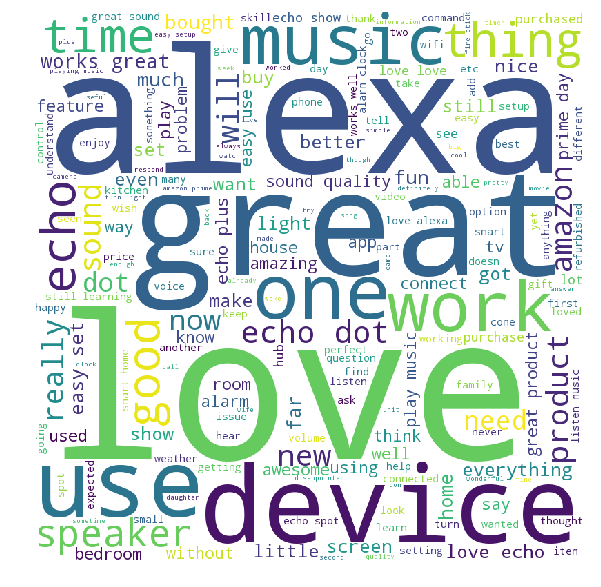

In [71]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dataset['verified_reviews']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
         comment_words = comment_words + words + ' '
#wordcloud plotting
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

most common words present in verified reviews are " use ,device ,love ,alexa, great ,music ,work"

In [72]:
replace_val={0:'negative' ,1:'positive'}
replace_val

{0: 'negative', 1: 'positive'}

In [73]:
dataset['feedback']=dataset['feedback'].replace([0],'negative')

In [74]:
dataset['feedback']=dataset['feedback'].replace([1],'positive')


In [75]:
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,positive
4,5,31-Jul-18,Charcoal Fabric,Music,positive


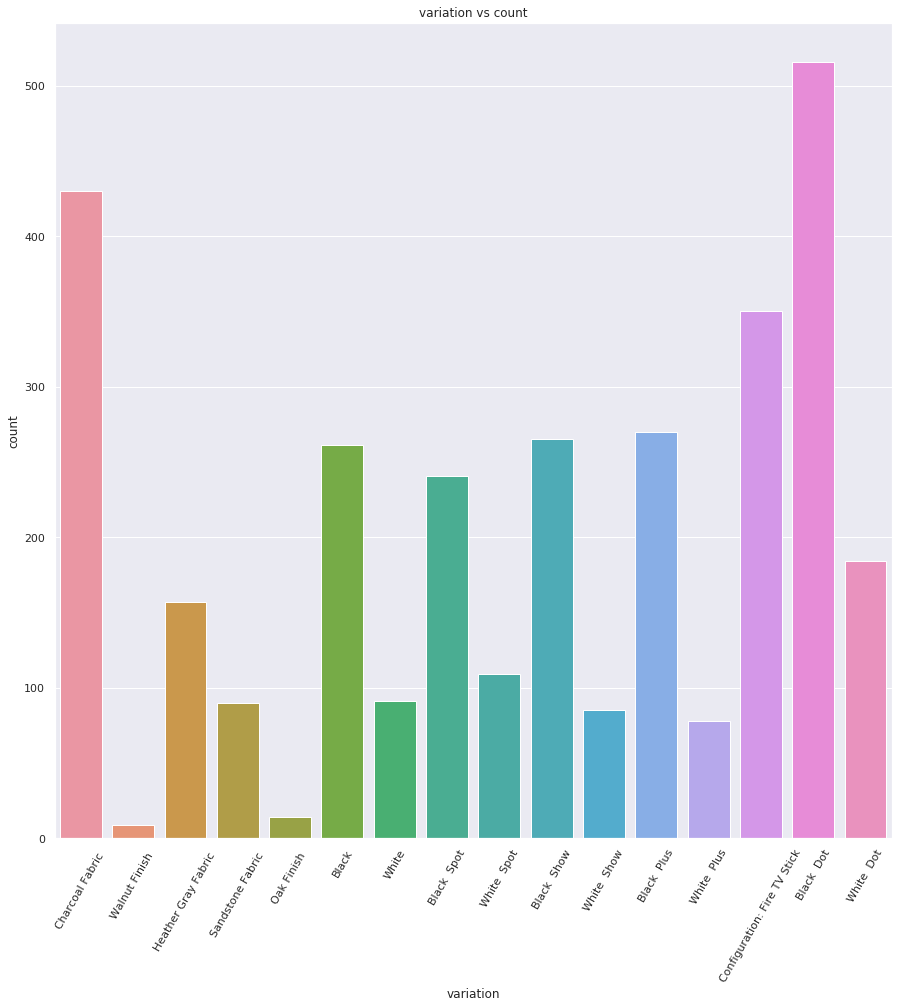

In [83]:
#count plot for variation 
import seaborn as sns
import matplotlib.pyplot as mlt
a=mlt.figure(figsize=(15,15))
sns.set(style="darkgrid")
ax = sns.countplot(x="variation", data=dataset)
mlt.xlabel("variation")
mlt.ylabel("count")
mlt.xticks(rotation=60)
mlt.title("variation vs count")
mlt.show()


from above we can conclude that black dot variation have more reviews and walnut finish have less reviews among all.

<Figure size 1080x1440 with 0 Axes>

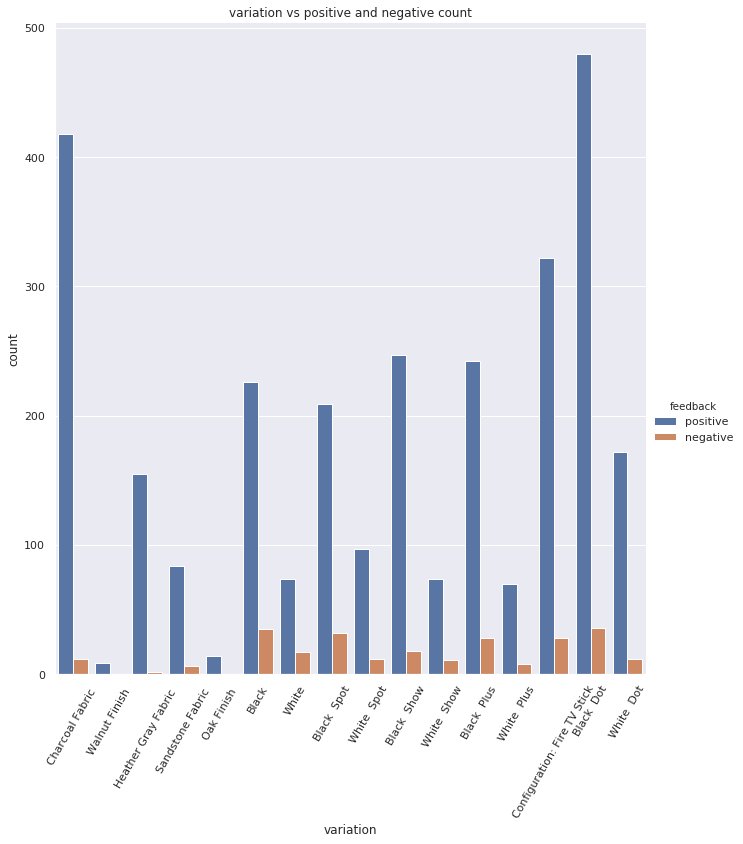

In [92]:
#plotting of feedback for each variation to check which have more positive feed back and which variation have more negative feedback
ax=mlt.figure(figsize=(15,20))
g = sns.catplot(x="variation", hue="feedback",data=dataset, kind="count",height=10,aspect=.9)
mlt.xlabel("variation")
mlt.title("variation vs positive and negative count")
mlt.ylabel("count")
mlt.xticks(rotation=60)
mlt.show()

as black dot variation have more reviews ,it also have more positive feedback .oak and walnut finish have negligible negative feedback .Black variation have more negative feedback

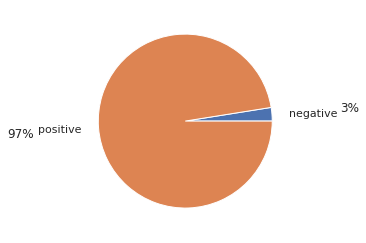

In [102]:
#piechart to se variation in positive and negative feedback
sums = dataset.rating.groupby(dataset.feedback).sum()
mlt.axis('equal');
mlt.pie(sums, labels=sums.index,autopct='%1.0f%%', pctdistance=1.9, labeldistance=1.2);
mlt.show()

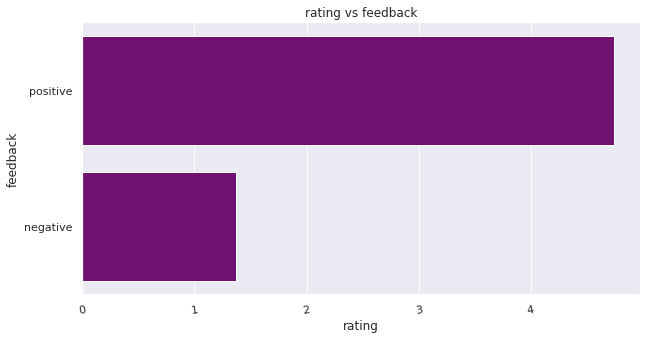

In [135]:
mlt.figure(figsize=(10,5))
barplot= sns.barplot(x="rating", y="feedback", data=dataset,ci=0,color="purple")

mlt.xticks(rotation=10)
mlt.title("rating vs feedback")
mlt.show()

In [76]:
#dataset splitting into features and labels
X = dataset['verified_reviews']
Y= dataset['feedback']

In [29]:
#verified_reviews as features
X.head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [30]:
#feedback as labels
Y.head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: feedback, dtype: object

In [32]:
#splitting of data into training and testing set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [34]:
train = [x for x in zip(X_train,Y_train)]
#textblob naivebayes classifier for sentiment analysis
classifier=NaiveBayesClassifier(train)

In [36]:
classifier

<NaiveBayesClassifier trained on 2520 instances>

In [38]:
#test data
test = [x for x in zip(X_test, Y_test)]

In [39]:
#checking of accuracy of naivebayesclassifier
classifier.accuracy(test)

0.8904761904761904

In [41]:
#most informative features from our training
classifier.show_informative_features(5)  

Most Informative Features
          contains(poor) = True           negati : positi =     40.2 : 1.0
        contains(Things) = True           negati : positi =     37.2 : 1.0
         contains(spent) = True           negati : positi =     32.9 : 1.0
 contains(disappointing) = True           negati : positi =     32.9 : 1.0
        contains(switch) = True           negati : positi =     32.9 : 1.0


In [ ]:
#end